In [44]:
import os
import cv2
import numpy as np

# Define your dataset path
data_dir = 'F:/Data Mining Project/dataset'

# Define category names (must match your folder names exactly)
categories = ['Cloudy', 'fogsmog', 'lightning', 'rain', 'rainbow', 'sandstorm', 'Shine', 'snow', 'Sunrise']

# Function to load and preprocess images
def load_data(data_dir):
    data = []
    labels = []

    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        count = 0

        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                img_array = cv2.imread(img_path)

                if img_array is not None:
                    data.append(img_array)
                    labels.append(class_num)
                    count += 1
            except Exception as e:
                print(f"Error Loading Image: {e}")
                pass

        print(f"[{category}] -> Loaded {count} Images")

    return data, np.array(labels)
def preprocess_images(images):
    resized_images = [cv2.resize(img, (64, 64)) for img in images]
    return np.array(resized_images)

x, y = load_data(data_dir)

[Cloudy] -> Loaded 279 Images
[fogsmog] -> Loaded 255 Images
[lightning] -> Loaded 269 Images
[rain] -> Loaded 287 Images
[rainbow] -> Loaded 232 Images
[sandstorm] -> Loaded 276 Images
[Shine] -> Loaded 253 Images
[snow] -> Loaded 257 Images
[Sunrise] -> Loaded 275 Images


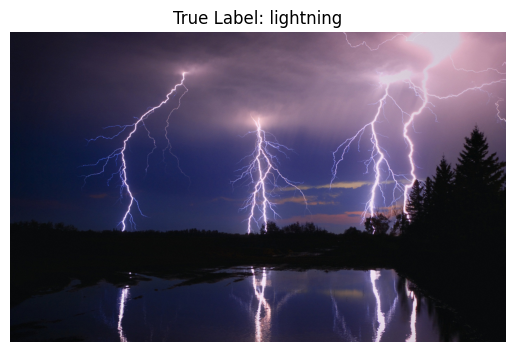

In [45]:
import random
import cv2
import matplotlib.pyplot as plt

# Categories (make sure this matches your label encoding)
categories = ['Cloudy', 'fogsmog', 'lightning', 'rain', 'rainbow', 'sandstorm', 'Shine', 'snow', 'Sunrise']

# Pick a random image to display
idx = random.randint(0, len(x) - 1)
img = x[idx]
true_label = categories[y[idx]]

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# Show the image
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"True Label: {true_label}")
plt.show()


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train = preprocess_images(X_train)
X_train = X_train / 255.0
print(f"Shape of Training Data is : {X_train.shape}")
print(f"Shape of Training Label is : {y_train.shape}")

Shape of Training Data is : (1906, 64, 64, 3)
Shape of Training Label is : (1906,)


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense , Flatten , Dropout


In [48]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu', input_shape = (64,64,3)),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(9,activation='softmax'),
])

In [49]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
X_test_resize = preprocess_images(X_test)
X_test_resize = X_test_resize / 255.0

In [50]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test_resize, y_test),
    batch_size=32,
    epochs=20
)


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - accuracy: 0.2457 - loss: 1.9752 - val_accuracy: 0.5639 - val_loss: 1.3440
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 176ms/step - accuracy: 0.5398 - loss: 1.2642 - val_accuracy: 0.6688 - val_loss: 0.9757
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 205ms/step - accuracy: 0.6320 - loss: 1.0306 - val_accuracy: 0.6771 - val_loss: 0.9043
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 199ms/step - accuracy: 0.6704 - loss: 0.9188 - val_accuracy: 0.7170 - val_loss: 0.8479
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 223ms/step - accuracy: 0.7301 - loss: 0.8067 - val_accuracy: 0.7254 - val_loss: 0.7938
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 261ms/step - accuracy: 0.7381 - loss: 0.7781 - val_accuracy: 0.7547 - val_loss: 0.7316
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 193ms/step - accuracy: 0.7475 - loss: 0.7310 - val_accuracy: 0.7610 - val_loss: 0.6578
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 193ms/step - accuracy: 0.7790 - loss: 0.6191 - val_accu

In [51]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test_resize, y_test)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9541 - loss: 0.1585
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8098 - loss: 0.6488
Train Accuracy: 0.95
Test Accuracy: 0.80


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


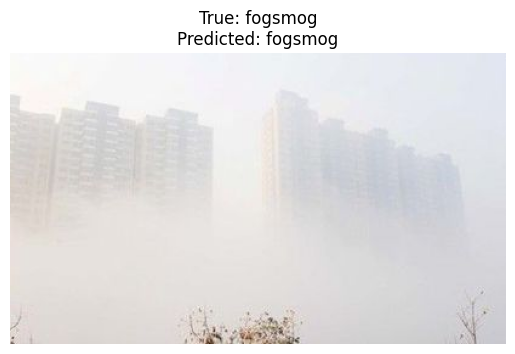

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2
idx = random.randint(0, len(X_test) - 1)
img_display = X_test[idx]
true_label = categories[y_test[idx]]
img_input = X_test_resize[idx]
pred = model.predict(np.expand_dims(img_input, axis=0))
predicted_label = categories[np.argmax(pred)]
plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


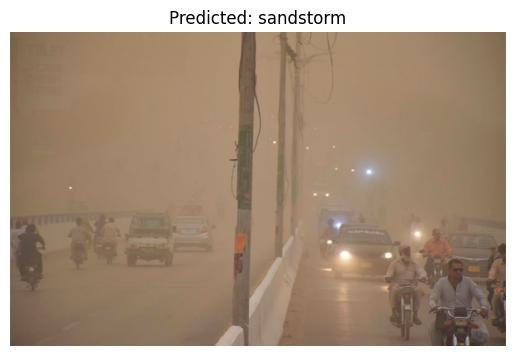

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
categories = ['Cloudy', 'fogsmog', 'lightning', 'rain', 'rainbow', 'sandstorm', 'Shine', 'snow', 'Sunrise']
image_path = 'F:/Data Mining Project/1.jpg'
img = cv2.imread(image_path)
img_resized = cv2.resize(img, (64, 64))
img_input = img_resized / 255.0
img_input = np.expand_dims(img_input, axis=0)
prediction = model.predict(img_input)
predicted_class = categories[np.argmax(prediction)]
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"Predicted: {predicted_class}")
plt.show()


In [76]:
import cv2
import numpy as np
categories = ['Cloudy', 'fogsmog', 'lightning', 'rain', 'rainbow', 'sandstorm', 'Shine', 'snow', 'Sunrise']
video_path = 'E:/2.mp4'
cap = cv2.VideoCapture(video_path)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    resized_frame = cv2.resize(frame, (64, 64))
    normalized = resized_frame / 255.0
    input_frame = np.expand_dims(normalized, axis=0) 
    prediction = model.predict(input_frame)
    predicted_class = categories[np.argmax(prediction)]
    cv2.putText(frame, f'Prediction: {predicted_class}', 
                (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 
                1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow('Weather Prediction', frame)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
